In [97]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from heatmap import *
import statsmodels.api as sm
import statsmodels.formula.api as smf



data = pd.read_csv("../multiOutput/summary/newData.tsv",
sep="\t",
dtype={'Pop':'str', 'Run':'int', 'Gen':'int', 'preAPref':'float', 'preIPref':'float', 'preOPref':'float', 'Matings':'float','Contacts':'float', 'MMContacts':'float', 'MalF':'float', 'FemF':'float', 'APref':'float', 'IPref':'float', 'OPref':'float','migrations':'float', 'A':'float', 'I':'float', 'O':'float', 'M':'float', 'F':'float', 'T':'float', 'matingSuccess':'float', 'misIdent':'float'})
data.fillna(value=0, inplace=True)


data["maleRatio"] = data["M"]/data["T"]
data.rename(index=str, columns={"T":"Total"}, inplace=True)
data.set_index(["Pop", "Run", "Gen"], inplace=True)



In [98]:
pops = data.groupby("Pop")

finals = data.iloc[data.index.get_level_values('Gen')==100]

finalPops = finals.groupby("Pop")
for pop, popData in pops:
    print(pop, popData["Total"].max(), popData["Total"].min(), popData["Total"].mean())

1 119.0 22.0 68.1703
2 141.0 49.0 97.9974
3 138.0 0.0 74.6985
4 18.0 0.0 7.421293007205927
Total 341.0 111.0 248.1784


## Multiple Linear Regression


### Controls

In [3]:
est = smf.ols(formula="A~I*O", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      A   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.195e+30
Date:                Thu, 06 Jun 2019   Prob (F-statistic):               0.00
Time:                        08:39:55   Log-Likelihood:                 15681.
No. Observations:                 475   AIC:                        -3.135e+04
Df Residuals:                     471   BIC:                        -3.134e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0000   2.18e-16    4.6e+15      0.0

In [4]:
est = smf.ols(formula="I~A*O", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      I   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.293e+31
Date:                Thu, 06 Jun 2019   Prob (F-statistic):               0.00
Time:                        08:39:55   Log-Likelihood:                 16027.
No. Observations:                 475   AIC:                        -3.205e+04
Df Residuals:                     471   BIC:                        -3.203e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0000   5.03e-17   1.99e+16      0.0

In [5]:
est = smf.ols(formula="O~I*A", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      O   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.216e+30
Date:                Thu, 06 Jun 2019   Prob (F-statistic):               0.00
Time:                        08:39:55   Log-Likelihood:                 15556.
No. Observations:                 475   AIC:                        -3.110e+04
Df Residuals:                     471   BIC:                        -3.109e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0000   1.15e-16   8.71e+15      0.0

In [6]:
est = smf.ols(formula="Total~A*I*O", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     23.07
Date:                Thu, 06 Jun 2019   Prob (F-statistic):           6.94e-24
Time:                        08:39:56   Log-Likelihood:                -2736.1
No. Observations:                 475   AIC:                             5486.
Df Residuals:                     468   BIC:                             5515.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.8795      6.227      7.207      0.0

### Preference per Morph

In [7]:
est = smf.ols(formula="preAPref~A*maleRatio", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:               preAPref   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     507.9
Date:                Thu, 06 Jun 2019   Prob (F-statistic):          3.63e-147
Time:                        08:39:56   Log-Likelihood:                 750.70
No. Observations:                 475   AIC:                            -1493.
Df Residuals:                     471   BIC:                            -1477.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1774      0.013     13.470      

In [8]:
est = smf.ols(formula="APref~A*maleRatio", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  APref   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     104.8
Date:                Thu, 06 Jun 2019   Prob (F-statistic):           5.77e-52
Time:                        08:39:56   Log-Likelihood:                 778.05
No. Observations:                 475   AIC:                            -1548.
Df Residuals:                     471   BIC:                            -1531.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2194      0.012     17.647      

In [9]:
est = smf.ols(formula="preIPref~I*maleRatio", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:               preIPref   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1192.
Date:                Thu, 06 Jun 2019   Prob (F-statistic):          1.67e-219
Time:                        08:39:56   Log-Likelihood:                 741.29
No. Observations:                 475   AIC:                            -1475.
Df Residuals:                     471   BIC:                            -1458.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1949      0.016     12.160      

In [10]:
est = smf.ols(formula="IPref~I*maleRatio", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  IPref   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     190.3
Date:                Thu, 06 Jun 2019   Prob (F-statistic):           7.93e-81
Time:                        08:39:56   Log-Likelihood:                 778.66
No. Observations:                 475   AIC:                            -1549.
Df Residuals:                     471   BIC:                            -1533.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2400      0.015     16.205      

In [11]:
est = smf.ols(formula="preOPref~O*maleRatio", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:               preOPref   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     595.7
Date:                Thu, 06 Jun 2019   Prob (F-statistic):          7.56e-160
Time:                        08:39:56   Log-Likelihood:                 589.23
No. Observations:                 475   AIC:                            -1170.
Df Residuals:                     471   BIC:                            -1154.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2124      0.033      6.506      

In [12]:
est = smf.ols(formula="OPref~O*maleRatio", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  OPref   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     88.40
Date:                Thu, 06 Jun 2019   Prob (F-statistic):           2.19e-45
Time:                        08:39:56   Log-Likelihood:                 659.07
No. Observations:                 475   AIC:                            -1310.
Df Residuals:                     471   BIC:                            -1293.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2710      0.028      9.613      

In [13]:
est = smf.ols(formula="FemF~A*Total", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   FemF   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     4.136
Date:                Thu, 06 Jun 2019   Prob (F-statistic):            0.00654
Time:                        08:39:56   Log-Likelihood:                 213.25
No. Observations:                 475   AIC:                            -418.5
Df Residuals:                     471   BIC:                            -401.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2851      0.013     22.480      0.0

In [14]:
est = smf.ols(formula="FemF~(A:I:O)+Total", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   FemF   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.952
Date:                Thu, 06 Jun 2019   Prob (F-statistic):             0.0532
Time:                        08:39:56   Log-Likelihood:                 210.03
No. Observations:                 475   AIC:                            -414.1
Df Residuals:                     472   BIC:                            -401.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2870      0.012     24.499      0.0

In [15]:
est = smf.ols(formula="MalF~(A:I:O)+Total", data=finals).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MalF   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     13.32
Date:                Thu, 06 Jun 2019   Prob (F-statistic):           2.36e-06
Time:                        08:39:56   Log-Likelihood:                 441.24
No. Observations:                 475   AIC:                            -876.5
Df Residuals:                     472   BIC:                            -864.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6825      0.007     94.777      0.0

# Plots

## Correlation

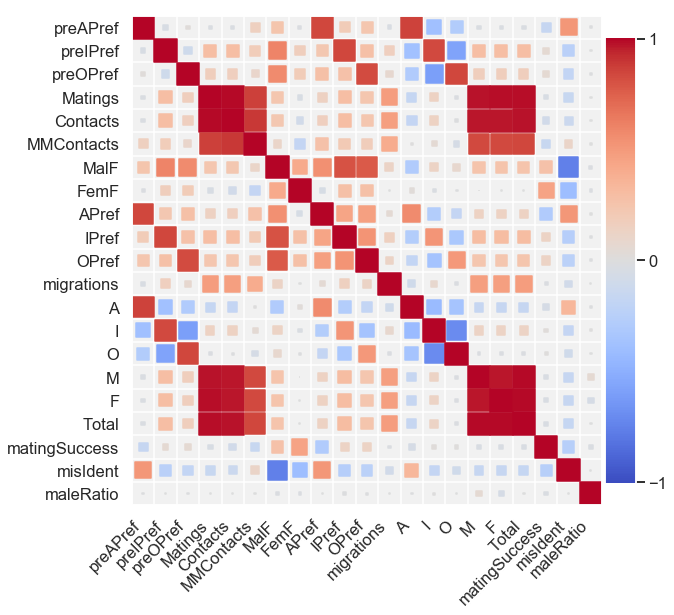

In [16]:
sns.set_context("talk")
sns.set_style("darkgrid")
corr = data.corr()
plt.figure(figsize=(10,10))
corrplot(data.corr())
plt.subplots_adjust(left=0.2, bottom=0.2)

## Correlation Per Population

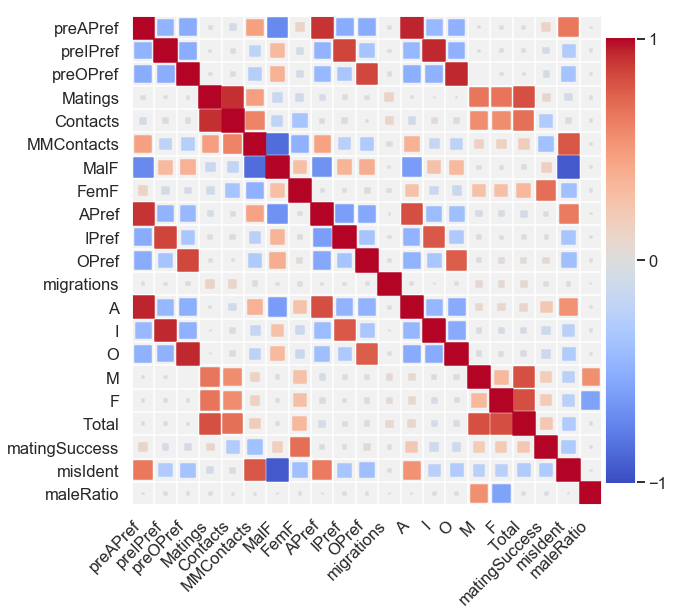

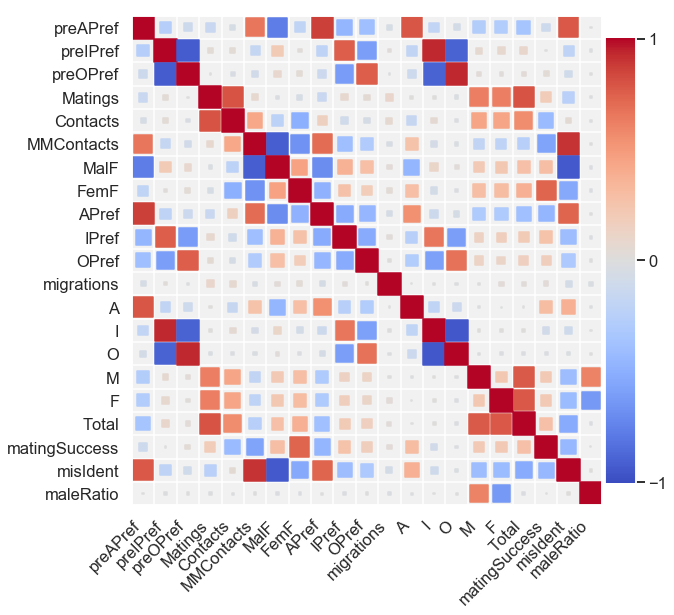

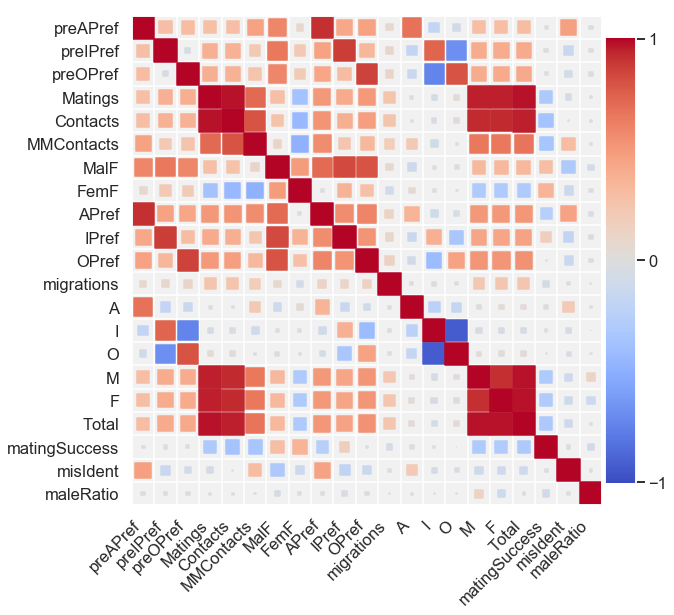

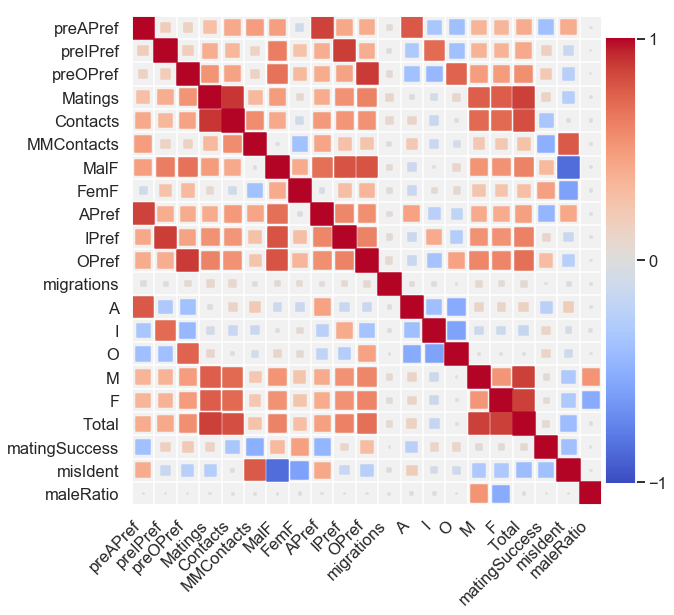

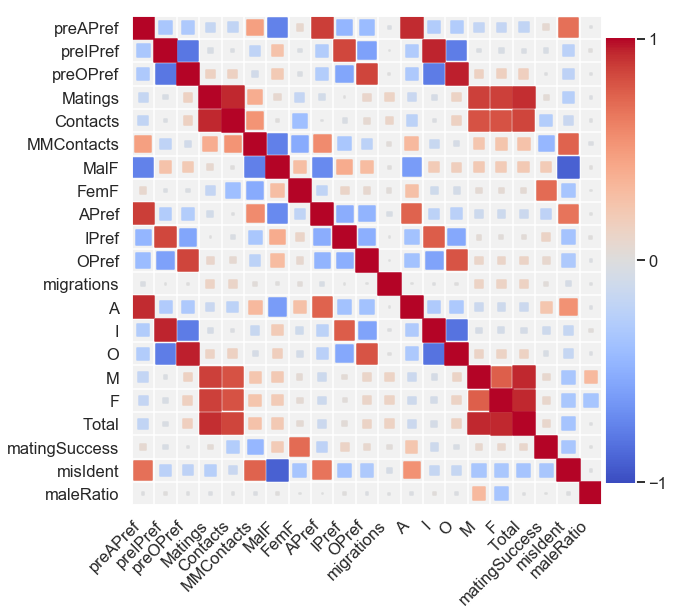

In [17]:
for pop, popData in pops:
    sns.set_style("darkgrid")
    plt.figure(figsize=(10,10))
    corrplot(popData.corr())
    plt.subplots_adjust(left=0.2, bottom=0.2)
    

## Preference vs. Frequency

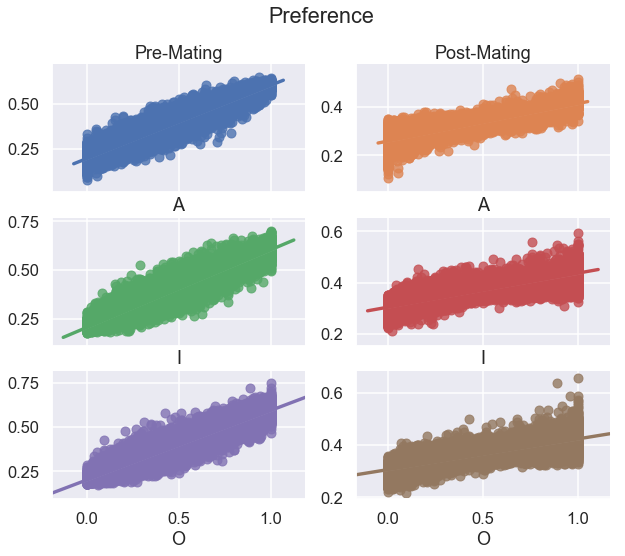

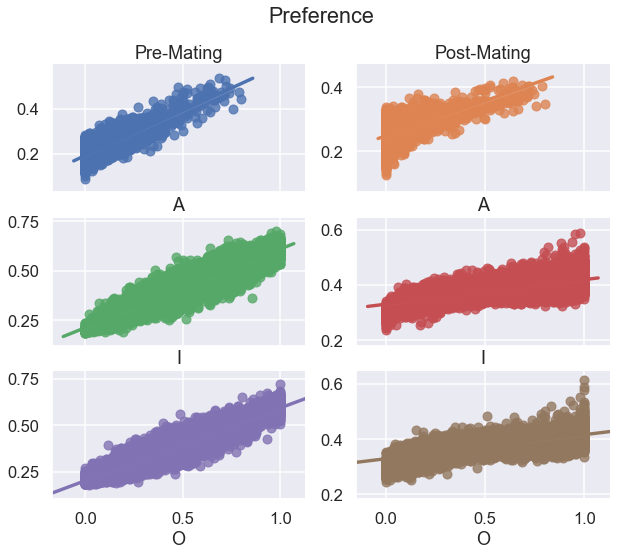

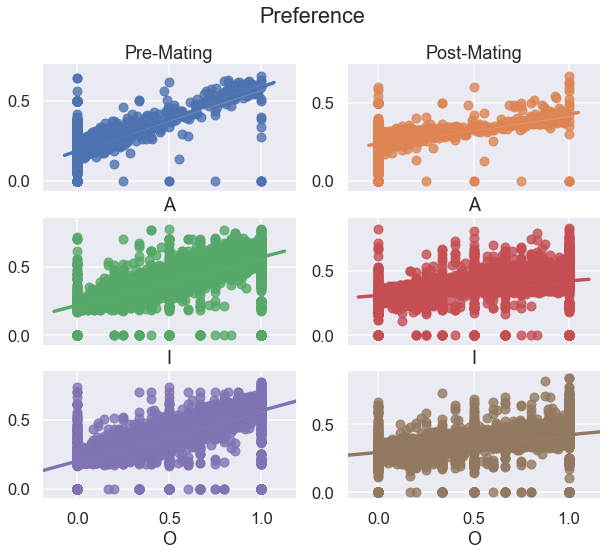

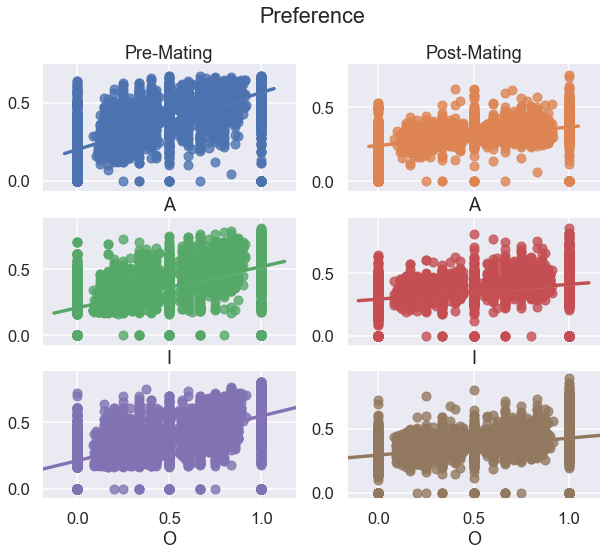

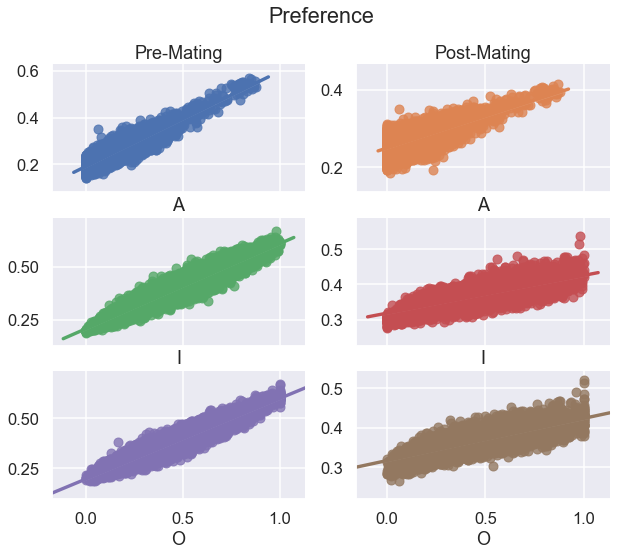

In [18]:
for pop, popData in pops:
    fig, axarr = plt.subplots(3,2, sharex ='col', sharey=False, figsize=(10,8))
    fig.suptitle("Preference")
    plot1 = sns.regplot(x="A", y="preAPref", data=popData, ax=axarr[0,0])
    plot1.set(ylabel="")
    plot1.set_title("Pre-Mating")
    plot2 = sns.regplot(x="A", y="APref", data=popData, ax=axarr[0,1])
    plot2.set(ylabel="")
    plot2.set_title("Post-Mating")
    plot3 = sns.regplot(x="I", y="preIPref", data=popData, ax=axarr[1,0])
    plot3.set(ylabel="")
    plot4 = sns.regplot(x="I", y="IPref", data=popData, ax=axarr[1,1])
    plot4.set(ylabel="")
    plot5 = sns.regplot(x="O", y="preOPref", data=popData, ax=axarr[2,0])
    plot5.set(ylabel="")
    plot6 = sns.regplot(x="O", y="OPref", data=popData, ax=axarr[2,1])
    plot6.set(ylabel="")
    sns.despine()

## Fertility Per Population

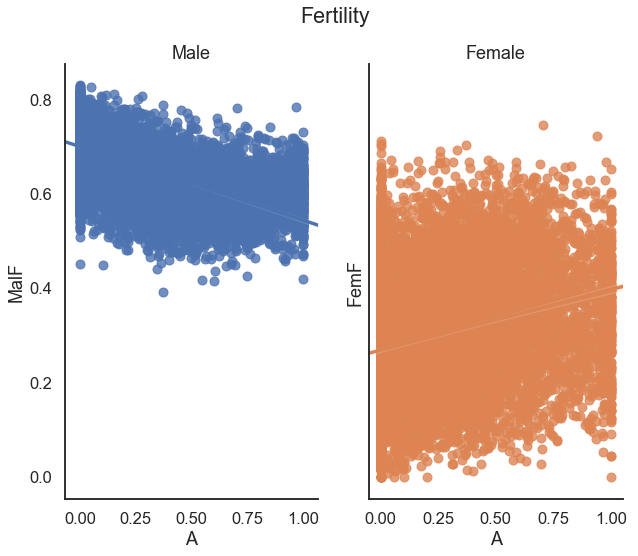

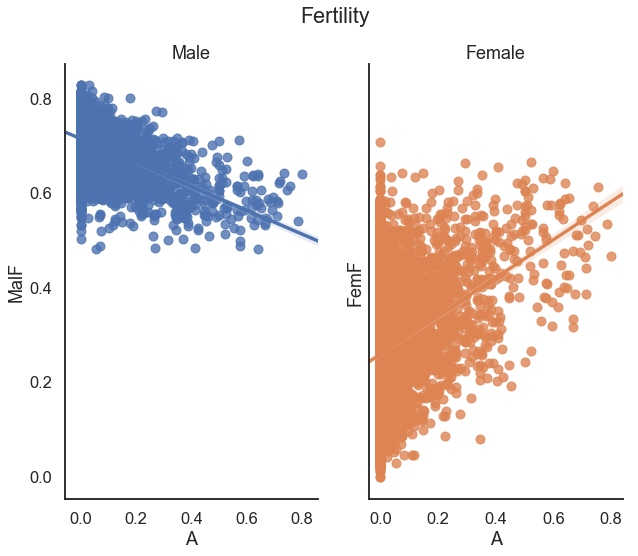

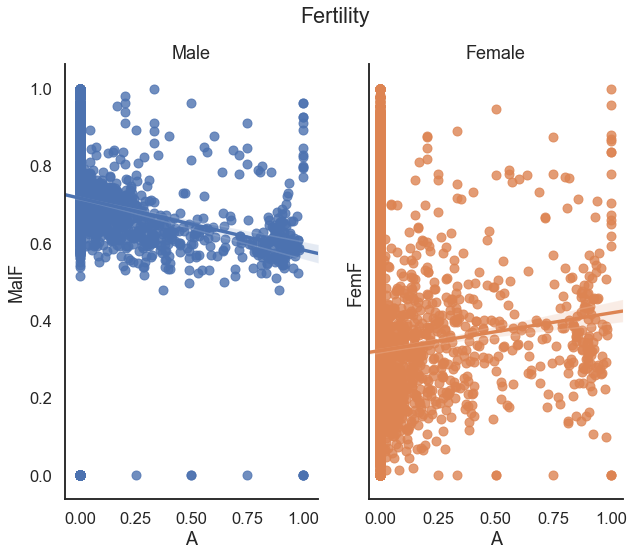

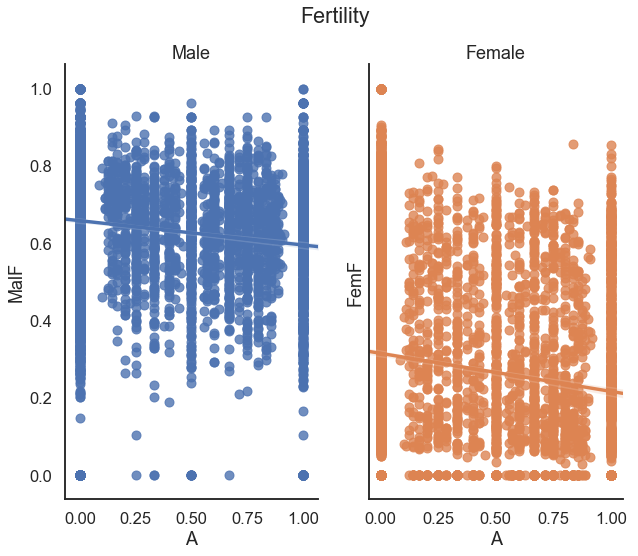

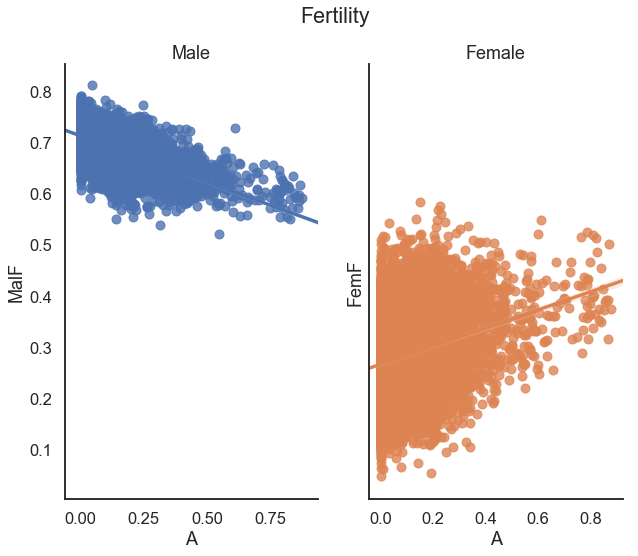

In [19]:
for pop, popData in pops:
    sns.set_style("white")
    fig, axarr = plt.subplots(1,2, sharey=True, figsize=(10,8))
    plot1 = sns.regplot(x="A", y="MalF", data=popData,ax=axarr[0])
    plot1.set_title("Male")
    plot2 = sns.regplot(x="A", y="FemF", data=popData, ax=axarr[1])
    plot2.set_title("Female")
    sns.despine()
    fig.suptitle("Fertility")

## Male-male Interactions

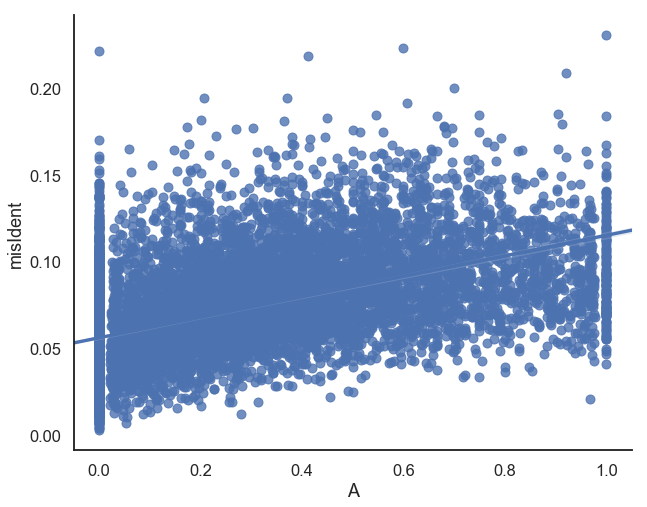

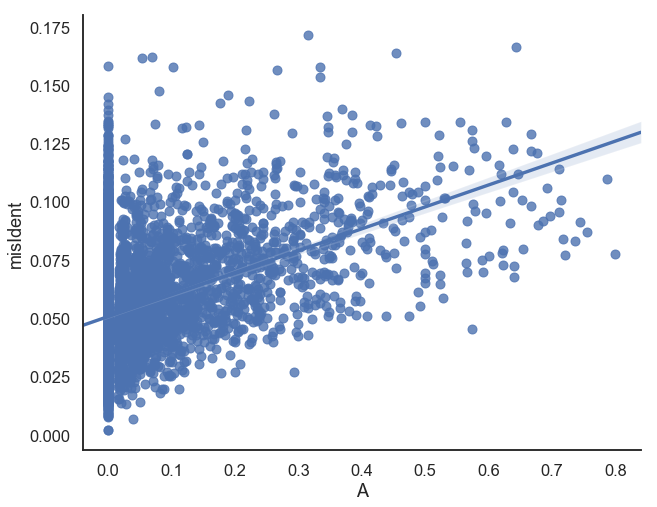

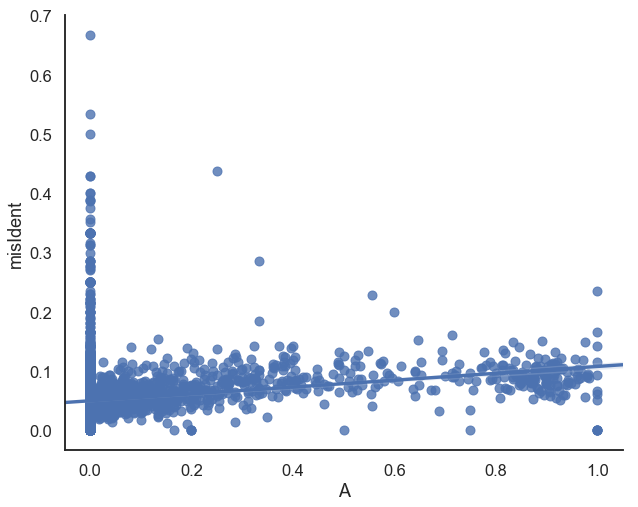

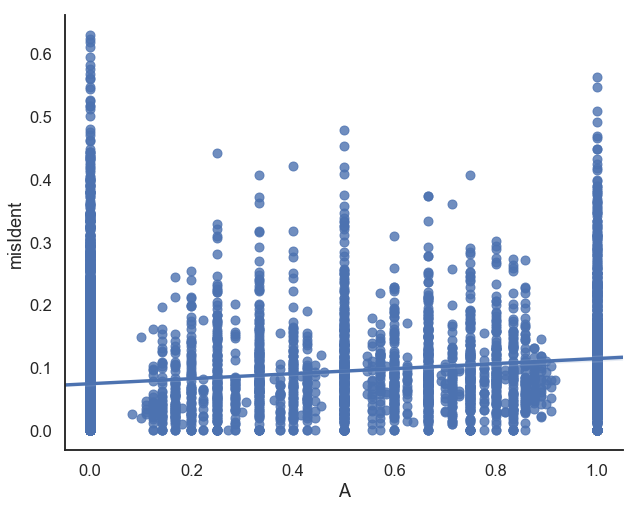

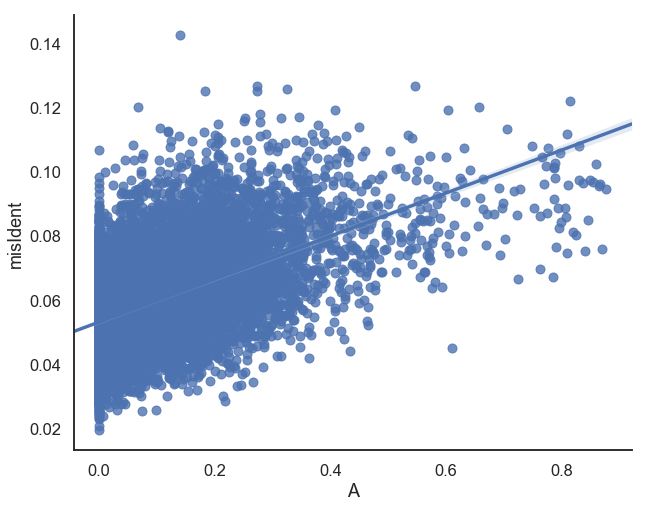

In [20]:
for pop, popData in pops:
    plt.figure(figsize=(10,8))
    plot = sns.regplot(x="A", y="misIdent", data=popData)
    sns.despine()

## Sex Distribution

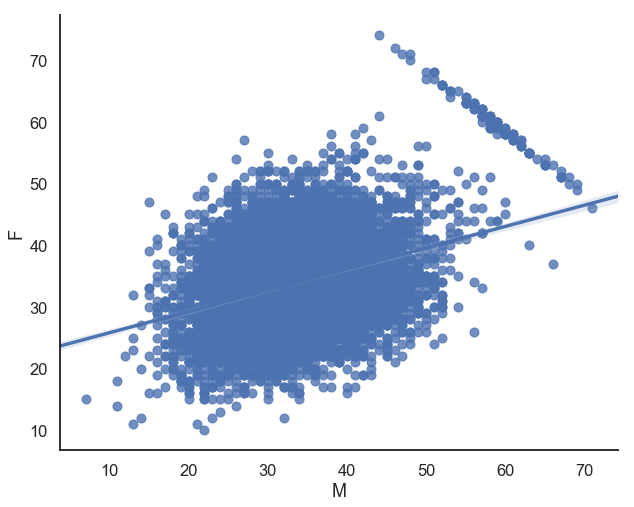

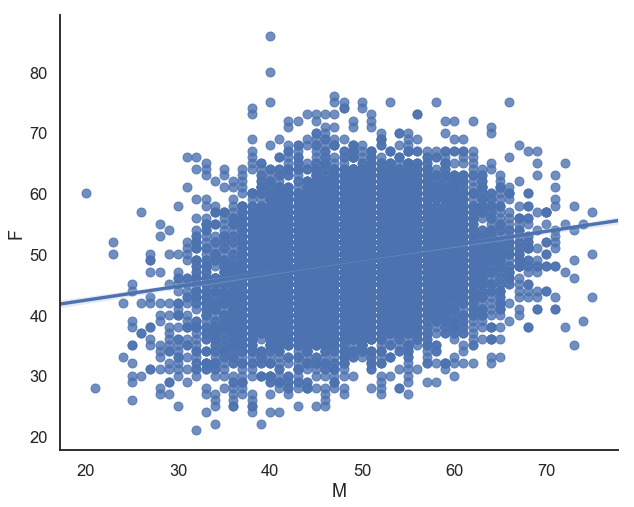

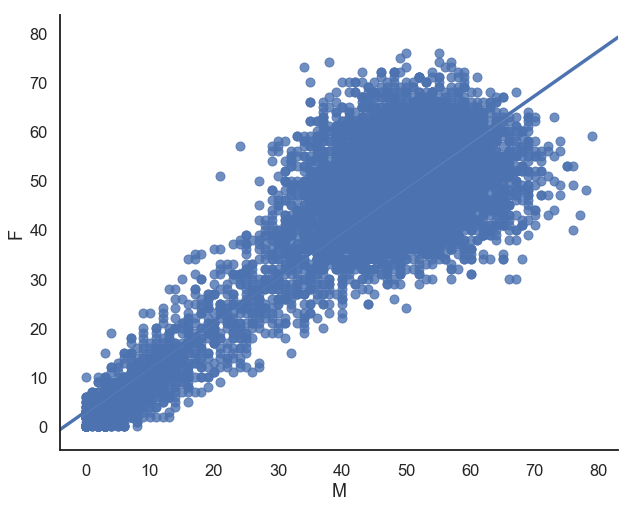

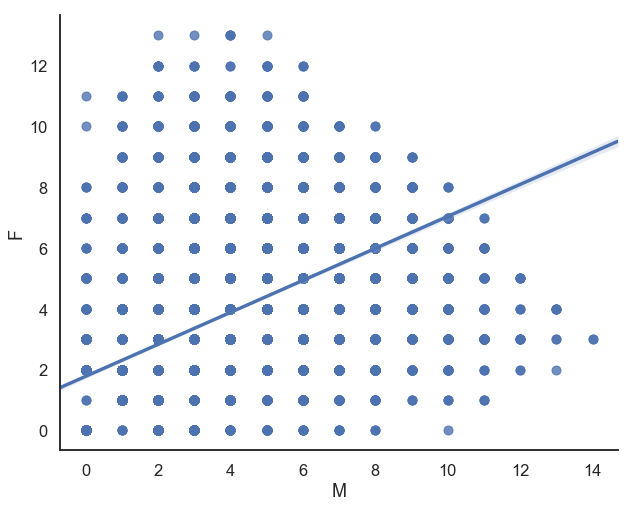

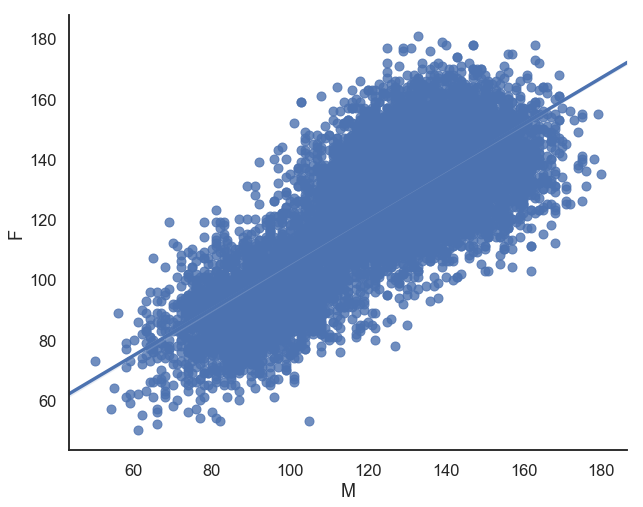

In [21]:
for pop, popData in pops:
    plt.figure(figsize=(10,8))
    plot = sns.regplot(x="M", y="F", data=popData)
    sns.despine()

## Migration

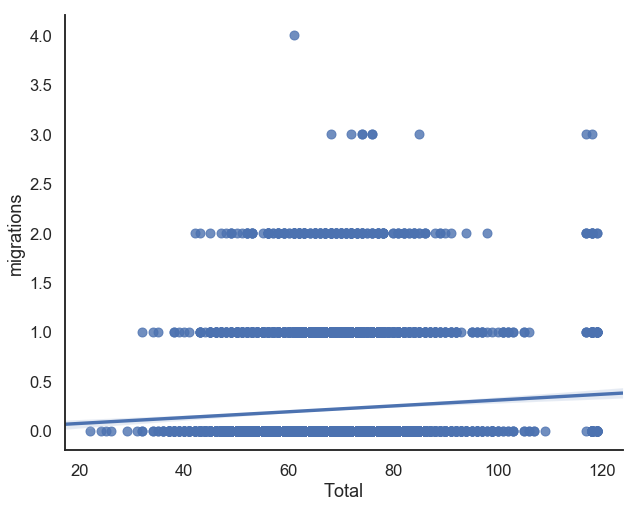

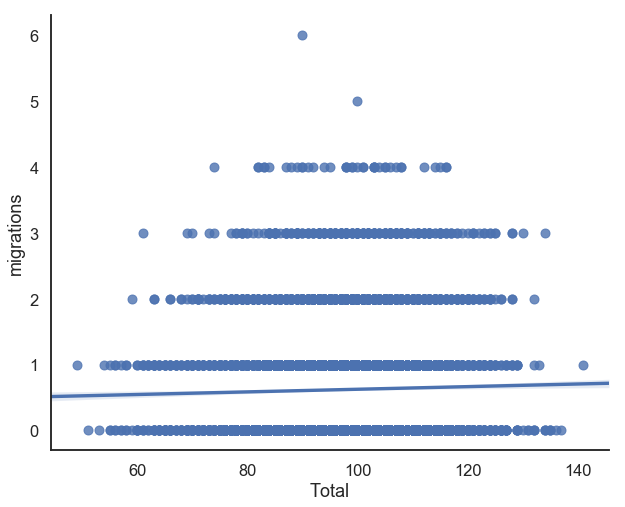

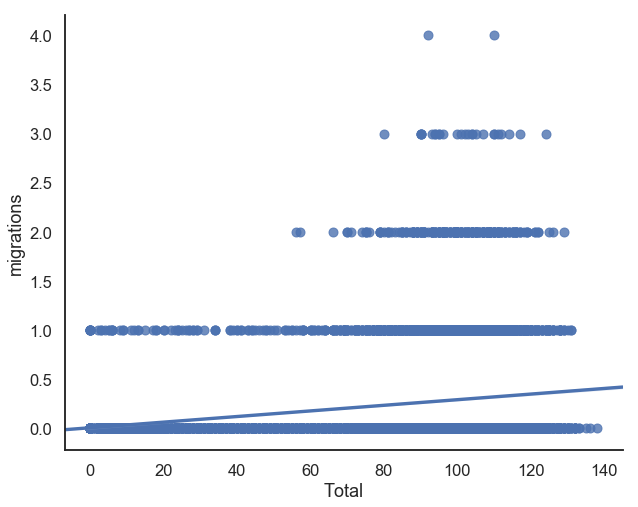

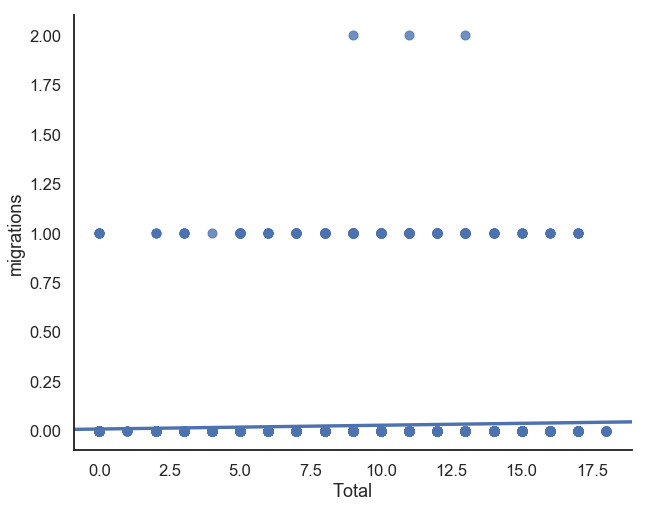

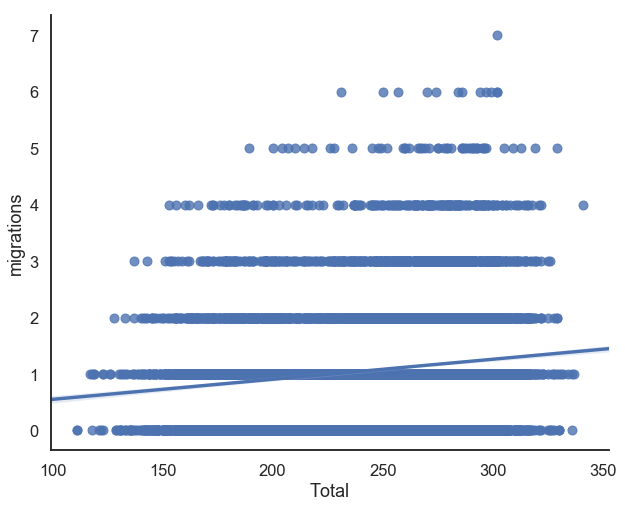

In [22]:
for pop, popData in pops:
    plt.figure(figsize=(10,8))
    plot = sns.regplot(x="Total", y="migrations", data=popData)
    sns.despine()

## Multiple Regression

In [23]:
from mpl_toolkits.mplot3d import Axes3D
X = data[["A", "I"]]
print(X.describe())
y = data["O"]
print(y.describe())
X = sm.add_constant(X)
est = sm.OLS(y,X, missing='drop').fit()
print(est.summary())


                  A             I
count  46892.000000  46892.000000
mean       0.130665      0.438922
std        0.243355      0.317366
min        0.000000      0.000000
25%        0.000000      0.162162
50%        0.000000      0.428571
75%        0.156303      0.689189
max        1.000000      1.000000
count    46892.000000
mean         0.430414
std          0.307642
min          0.000000
25%          0.182749
50%          0.387969
75%          0.656250
max          1.000000
Name: O, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      O   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.526e+30
Date:                Thu, 06 Jun 2019   Prob (F-statistic):               0.00
Time:                        08:41:10   Log-Likelihood:             1.3823e+06
No. Observations:   

c:\users\lorenzo\appdata\local\programs\python\python36-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Text(0.5, 0, 'O')

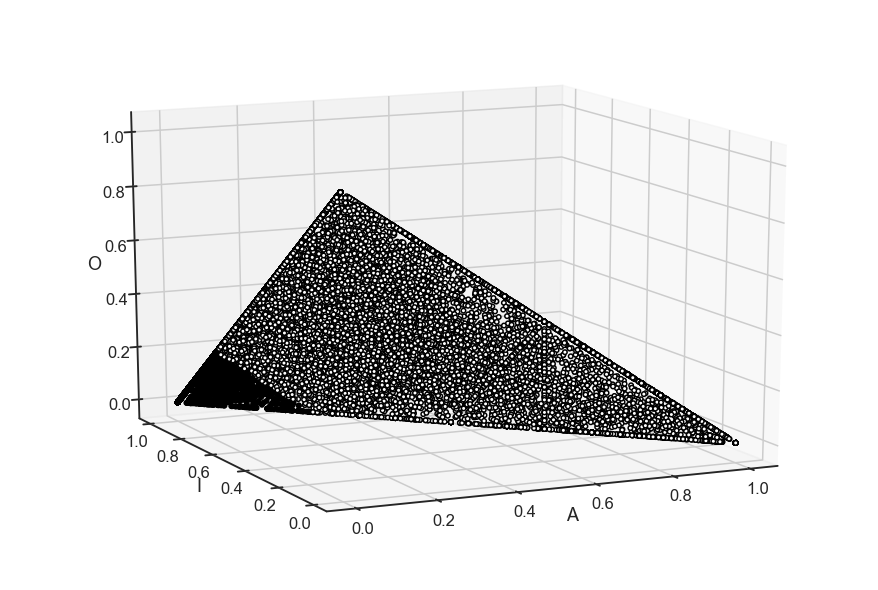

In [24]:
xx1, xx2 = np.meshgrid(np.linspace(X.A.min(), X.A.max(), 100), np.linspace(X.I.min(), X.I.max(), 100))
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

resid = y - est.predict(X)

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

#surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.winter, alpha=0.6, linewidth=0)

ax.scatter(X[resid >= 0].A, X[resid >= 0].I, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].A, X[resid < 0].I, y[resid < 0], color='black', alpha=1.0)

ax.set_xlabel('A')
ax.set_ylabel('I')
ax.set_zlabel('O')


## Bokeh Testing

In [101]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, CDSView, GroupFilter
output_notebook()
p = figure(title="Test", x_axis_label="Males", y_axis_label="Females")
source = ColumnDataSource(finals.reset_index())
pop1 = CDSView(source=source, filters=[GroupFilter(column_name="Pop", group="1")])
pop2 = CDSView(source=source, filters=[GroupFilter(column_name="Pop", group="2")])
pop3 = CDSView(source=source, filters=[GroupFilter(column_name="Pop", group="3")])
pop4 = CDSView(source=source, filters=[GroupFilter(column_name="Pop", group="4")])
totalPop = CDSView(source=source, filters=[GroupFilter(column_name="Pop", group="Total")])

colors = {"1": "red", "2": "blue", "3": "green", "4": "yellow", "Total": "black"}
p.circle(x="M", y="F", legend=None, line_color="red", color = "red", source = source, view=pop1)
p.circle(x="M", y="F", legend=None, line_color="blue", color = "blue", source = source, view=pop2)
p.circle(x="M", y="F", legend=None, line_color="green", color = "green", source = source, view=pop3)
p.circle(x="M", y="F", legend=None, line_color="yellow", color = "yellow", source = source, view=pop4)
p.circle(x="M", y="F", legend=None, line_color="black", color = "black", source = source, view=totalPop)

for pop, popData in pops:
    par = np.polyfit(popData["M"], popData["F"], 1, full=True)
    slope = par[0][0]
    intercept = par[0][1]
    y_predicted = [slope*i + intercept for i in popData["M"]]
    p.line(popData["M"],y_predicted, color=colors[pop], legend='F='+str(round(slope,2))+'M+'+str(round(intercept,2)))

show(p)


Loading BokehJS ...